In [1]:

import pandas as pd
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
import nltk

np.set_printoptions(suppress=True)

%matplotlib inline

In [2]:

from sklearn.metrics import confusion_matrix

In [3]:
df_input_prefiltered = pd.read_csv('/content/drive/MyDrive/spamdata.csv')
df = pd.read_csv('/content/drive/MyDrive/spaminput.csv')

#updating column names to join dataframes on keys
df_input_prefiltered.columns = ['id','label']

#dataframe merge and assign corresponding label
df_input = pd.merge(df, df_input_prefiltered, on=['id'])

In [4]:
df_input.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,label
0,NaN,Tue May 17 13:40:51 +0000 2016,iTunes Amazon Xbox,NaN,http://abo.io/dyfyyxgq,0,732566554450268000,NaN,NaN,NaN,en,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","get free #iTunes, #Amazon, #Xbox and other gif...",https://twitter.com/Mallorca1978M/status/73256...,Sat Apr 19 10:07:25 +0000 2014,2494392017,False,QUIEN ES EL QUIEN MOLA MAS? EL PEQUEÑO NICOLAS,13,6,0,0,Pakistán,Spain,Mallorca1978M,32,NaN,NaN,False,1
1,NaN,Tue May 17 13:40:51 +0000 2016,iTunes Amazon Xbox,NaN,http://abo.io/dyfyyxgq,0,732566554450268000,NaN,NaN,NaN,en,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","get free #iTunes, #Amazon, #Xbox and other gif...",https://twitter.com/Mallorca1978M/status/73256...,Sat Apr 19 10:07:25 +0000 2014,2494392017,False,QUIEN ES EL QUIEN MOLA MAS? EL PEQUEÑO NICOLAS,13,6,0,0,Pakistán,Spain,Mallorca1978M,32,NaN,NaN,False,0
2,NaN,Tue May 17 13:40:51 +0000 2016,iTunes Amazon Xbox,NaN,http://abo.io/dyfyyxgq,0,732566554450268000,NaN,NaN,NaN,en,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","get free #iTunes, #Amazon, #Xbox and other gif...",https://twitter.com/Mallorca1978M/status/73256...,Sat Apr 19 10:07:25 +0000 2014,2494392017,False,QUIEN ES EL QUIEN MOLA MAS? EL PEQUEÑO NICOLAS,13,6,0,0,Pakistán,Spain,Mallorca1978M,32,NaN,NaN,False,1
3,NaN,Tue May 17 13:40:51 +0000 2016,iTunes Amazon Xbox,NaN,http://abo.io/dyfyyxgq,0,732566554450268000,NaN,NaN,NaN,en,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","get free #iTunes, #Amazon, #Xbox and other gif...",https://twitter.com/Mallorca1978M/status/73256...,Sat Apr 19 10:07:25 +0000 2014,2494392017,False,QUIEN ES EL QUIEN MOLA MAS? EL PEQUEÑO NICOLAS,13,6,0,0,Pakistán,Spain,Mallorca1978M,32,NaN,NaN,False,0
4,NaN,Tue May 17 13:40:08 +0000 2016,nipples clit bigTits,https://twitter.com/jamalnagaran/status/732566...,NaN,3,732566374069895000,NaN,NaN,NaN,en,NaN,True,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",#nipples #clit #bigTits Babe bound in red stoc...,https://twitter.com/jamalnagaran/status/732566...,Mon Mar 16 07:25:20 +0000 2015,3088275786,False,"Girls with huge boobs, hot porn pics and the b...",0,7900,0,32,"Miami Beach, FL",Big Tits Pics,jamalnagaran,28220,NaN,NaN,False,1


In [5]:
ham_df = df_input[df_input.label == 0]
spam_df = df_input[df_input.label == 1]

ham_df = ham_df.sample(len(spam_df))
df = pd.concat([ham_df,spam_df])

In [6]:
print("Number of Spam tweets:",len(spam_df),"\n")
print("Number of Ham tweets:",len(ham_df))

Number of Spam tweets: 1133 

Number of Ham tweets: 1133


In [7]:
df.isnull().sum()

coordinates                   2259
created_at                       0
hashtags                      1618
media                         1882
urls                          1017
favorite_count                   0
id                               0
in_reply_to_screen_name       2001
in_reply_to_status_id         2062
in_reply_to_user_id           2000
lang                             0
place                         2201
possibly_sensitive             849
quote_id                      2157
retweet_count                    0
retweet_id                    1719
retweet_screen_name           1719
source                           0
text                             0
tweet_url                        0
user_created_at                  0
user_id                          0
user_default_profile_image       0
user_description               550
user_favourites_count            0
user_followers_count             0
user_friends_count               0
user_listed_count                0
user_location       

In [8]:
print("\nNumber of tweets with null coordinates:",df.coordinates.isnull().sum(),"\nHence, we remove this feature.")

del df['coordinates']


Number of tweets with null coordinates: 2259 
Hence, we remove this feature.


In [9]:

print(df.created_at.head(1))
print("\nWe split tweets time stamp into Day, Month, Date, Hour, Min, Sec, Year\n")

3056    Tue May 17 13:44:42 +0000 2016
Name: created_at, dtype: object

We split tweets time stamp into Day, Month, Date, Hour, Min, Sec, Year



In [11]:
df['tweet_day'] = df.created_at.str.split(" ").str[0]
df['tweet_month'] = df.created_at.str.split(" ").str[1]
df['tweet_date'] = df.created_at.str.split(" ").str[2]
df['tweet_time'] = df.created_at.str.split(" ").str[3]
df['tweet_year'] = df.created_at.str.split(" ").str[5]
df = df.reset_index(drop=True)



In [12]:
df['acc_created_day'] = df.user_created_at.str.split(" ").str[0]
df['acc_created_month'] = df.user_created_at.str.split(" ").str[1]
df['acc_created_date'] = df.user_created_at.str.split(" ").str[2]
df['acc_created_time'] = df.user_created_at.str.split(" ").str[3]
df['acc_created_year'] = df.user_created_at.str.split(" ").str[5]

In [13]:
df['hashtags']=df['hashtags'].fillna(0)

has_hashtags = []
num_hashtags = []

for i in range(0,len(df)):
    if(df.hashtags.iloc[i] == 0):
        has_hashtags.append(0)
        num_hashtags.append(0)
    else:
        has_hashtags.append(1)
        num_hashtags.append(len(df.hashtags.iloc[i].split(" ")))
    
df['has_hashtags'] = has_hashtags
df['num_hashtags'] = num_hashtags

In [14]:
df['media'] = df['media'].fillna(0)

has_media = []

for i in range(0,len(df)):
    if(df.media.iloc[i] == 0):
        has_media.append(0)
    else:
        has_media.append(1)

df['has_media'] = has_media

In [15]:
df['urls'] = df['urls'].fillna(0)

has_urls = []

for i in range(0,len(df)):
    if(df.urls.iloc[i] == 0):
        has_urls.append(0)
    else:
        has_urls.append(1)

df['has_urls'] = has_urls

In [16]:
has_favorite_count = []

for i in range(0,len(df)):
    if(df.favorite_count.iloc[i] == 0):
        has_favorite_count.append(0)
    else:
        has_favorite_count.append(1)

df['has_favorite_count'] = has_favorite_count

In [17]:
del df['lang']

In [18]:
has_place = []

df['place'] = df['place'].fillna(0)

for i in range(0,len(df)):
    if(df.place.iloc[i] == 0):
        has_place.append(0)
    else:
        has_place.append(1)
    
df['has_place'] = has_place

In [19]:
has_retweet_count = []

for i in range(0,len(df)):
    if(df.retweet_count.iloc[i] == 0):
        has_retweet_count.append(0)
    else:
        has_retweet_count.append(1)
    
df['has_retweet_count'] = has_retweet_count

In [20]:
is_RT = []

for i in range(0,len(df)):
    if(df.text.iloc[i][:2] == "RT"):
        is_RT.append(1)
    else:
        is_RT.append(0)
        
df['is_RT'] = is_RT

In [21]:
df['has_user_description']=df.user_description.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_followers_count']=df.user_followers_count.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_listed_count']=df.user_listed_count.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_name']=df.user_name.apply( lambda x: 0 if pd.isnull(x) else 1)
df['is_user_verfied']= df.user_verified.apply(lambda x: 1 if x is True else 0 )

In [22]:
df['f_ratio'] = (df['user_followers_count']+1)/(df['user_followers_count']+1 + df['user_friends_count']+1)

In [23]:
length = []
for i in range(0,len(df)):
    length.append(len(df.iloc[i].text))
df['length'] = length

In [24]:
digits_list = []

for i in range(0,len(df)):
    if(sum(c.isdigit() for c in df.text.iloc[i]) == 0):
        digits_list.append(0)
    else:
        digits_list.append(sum(c.isdigit() for c in df.text.iloc[i]))

digits_col = pd.Series(digits_list)
df['DIGITS'] = digits_col.values

In [25]:
cap_list = []

for i in range(0,len(df)):
    words = df.text.iloc[i].split()
    count = 0
    for j in range(0,len(words)):
        if(words[j].isupper()):
            count = count + 1;
    cap_list.append(count)    
    #print(cap_list)
        
cap_col = pd.Series(cap_list)
df['CAP'] = cap_col.values

In [27]:
import nltk
nltk.download('stopwords')
filtered_text = []

for i in range(0,len(df)):
    word_list = str(df.text.iloc[i]).split()
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    filtered_text.append(' '.join(filtered_words))
df['filtered_text'] = filtered_text
df['filtered_text_lower'] = df['filtered_text'].str.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
df.columns

Index(['created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'place', 'possibly_sensitive', 'quote_id',
       'retweet_count', 'retweet_id', 'retweet_screen_name', 'source', 'text',
       'tweet_url', 'user_created_at', 'user_id', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'label', 'tweet_day', 'tweet_month',
       'tweet_date', 'tweet_time', 'tweet_year', 'acc_created_day',
       'acc_created_month', 'acc_created_date', 'acc_created_time',
       'acc_created_year', 'has_hashtags', 'num_hashtags', 'has_media',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_foll

In [29]:
spam_text = []
spam_df = df[df.label==1]

for i in range(0,len(spam_df)):
    spam_text.append(spam_df.filtered_text.iloc[i])
    
ham_text = []
ham_df = df[df.label==0]

for i in range(0,len(ham_df)):
    ham_text.append(ham_df.filtered_text.iloc[i])


Below is the plot of 50 most commonly used words in SPAM comment


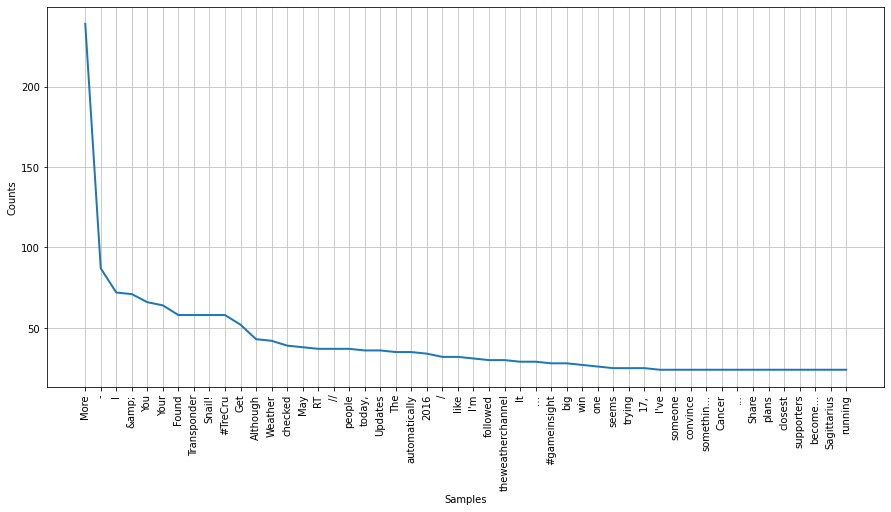


Below is the plot of 50 most commonly used words in HAM comment


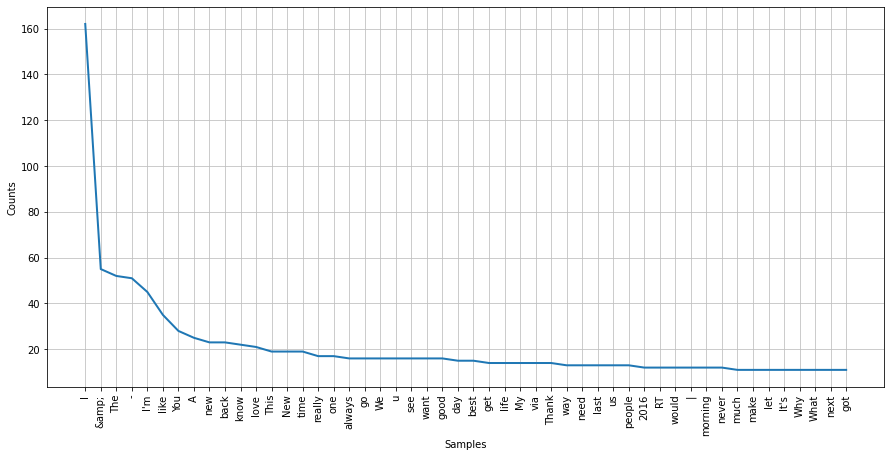

In [30]:
spam_text = ' '.join(spam_text).split()
freq = nltk.FreqDist(spam_text)

print("\nBelow is the plot of 50 most commonly used words in SPAM comment")
plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

ham_text = ' '.join(ham_text).split()
freq = nltk.FreqDist(ham_text)
print("\nBelow is the plot of 50 most commonly used words in HAM comment")

plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

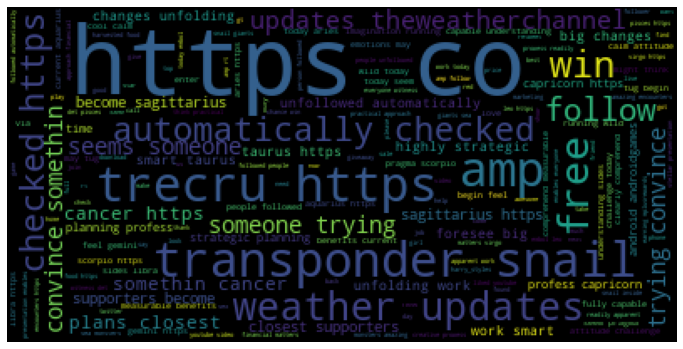

In [31]:
text = ''
for i in range(0,len(spam_df)):
    text = text + str(spam_df.filtered_text_lower.iloc[i])
    
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

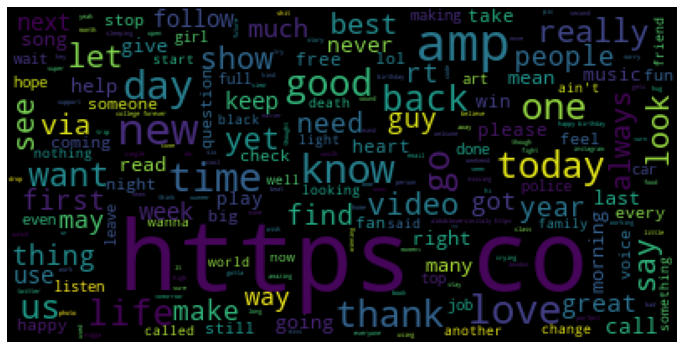

In [32]:
text = ''
for i in range(0,len(ham_df)):
    text = text + str(ham_df.filtered_text_lower.iloc[i])
    
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
from textblob import TextBlob

polarity=[]
subjectivity=[]
sentiment_flag=[]
subjectivity_flag=[]
for i in df.filtered_text_lower:
    testimonial = TextBlob(i).sentiment
    polarity.append(testimonial.polarity)
    subjectivity.append(testimonial.subjectivity)
    
    if testimonial.polarity>0.33:
        sentiment_flag.append('positive')
    elif testimonial.polarity<-0.33:
        sentiment_flag.append('negative')
    else:
        sentiment_flag.append('neutral')
        
    if testimonial.subjectivity>0.66:
        subjectivity_flag.append('subjective')
    elif testimonial.subjectivity<0.33:
        subjectivity_flag.append('objective')
    else:
        subjectivity_flag.append('neutral')
            

            
print("The polarity score is a float within the range [-1.0, 1.0]. \nThe subjectivity is a float within the range [0.0, 1.0] \nwhere 0.0 is very objective and 1.0 is very subjective.")            
df['polarity']=pd.Series(polarity)
df['subjectivity']=pd.Series(subjectivity)
df['sentiment_flag']=pd.Series(sentiment_flag)
df['subjectivity_flag']=pd.Series(subjectivity_flag)
df[['polarity','subjectivity','sentiment_flag','subjectivity_flag']].head()

The polarity score is a float within the range [-1.0, 1.0]. 
The subjectivity is a float within the range [0.0, 1.0] 
where 0.0 is very objective and 1.0 is very subjective.


,polarity,subjectivity,sentiment_flag,subjectivity_flag
0,0.277778,0.383333,neutral,neutral
1,0.000000,0.000000,neutral,objective
2,0.600000,0.950000,positive,subjective
3,0.000000,0.000000,neutral,objective
4,0.000000,0.000000,neutral,objective


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


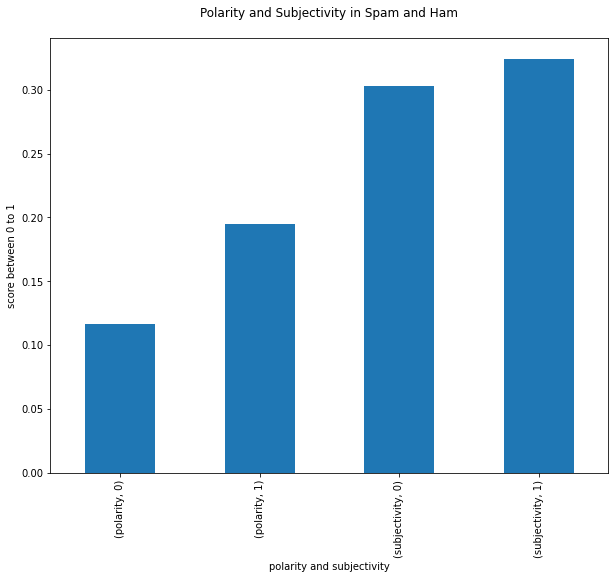

In [34]:
plt.figure(figsize=(10,8))
res=df.groupby(['label'])['polarity','subjectivity'].mean()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("score between 0 to 1")
plt.xlabel("polarity and subjectivity")
plt.title("Polarity and Subjectivity in Spam and Ham\n")
plt.show()

<Figure size 720x576 with 0 Axes>

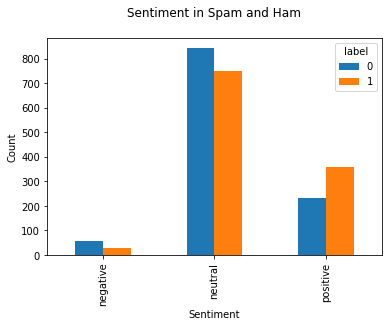

In [35]:

plt.figure(figsize=(10,8))
res= df.groupby(['label','sentiment_flag'])['filtered_text_lower'].count()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.title("Sentiment in Spam and Ham\n")
plt.show()

<Figure size 720x576 with 0 Axes>

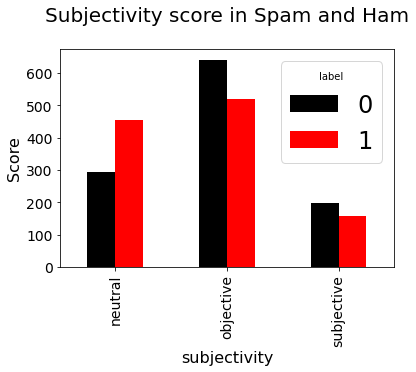

In [38]:
plt.figure(figsize=(10,8))
res= df.groupby(['label','subjectivity_flag'])['filtered_text_lower'].count()
res.unstack(level=0).plot(kind='bar',color=['black','red'])
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.ylabel("Score")
plt.xlabel("subjectivity")
plt.title("Subjectivity score in Spam and Ham\n")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


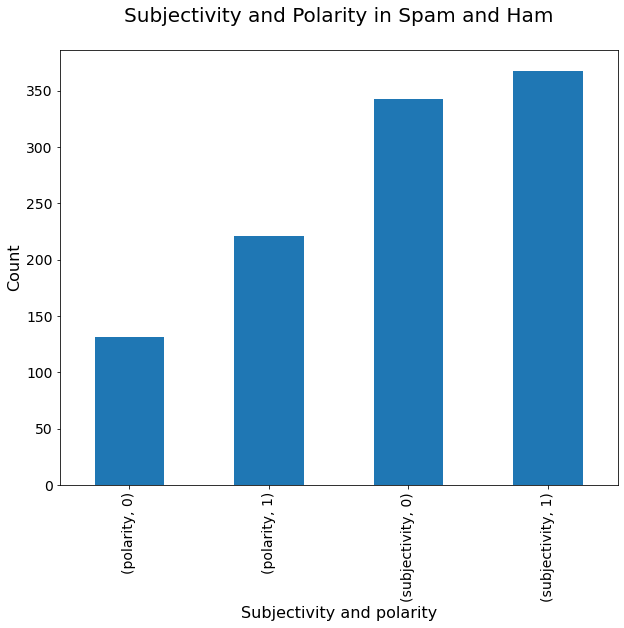

In [39]:
plt.figure(figsize=(10,8))
res= df.groupby(['label'])['polarity','subjectivity'].sum()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Subjectivity and polarity")
plt.title("Subjectivity and Polarity in Spam and Ham\n")
plt.show()

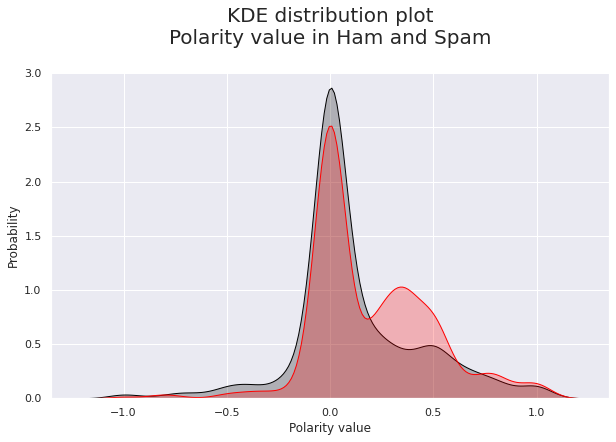

In [40]:
import seaborn as sns


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})
res=[x for x in list(df[df.label==0].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham",color='black');
res=[x for x in list(df[df.label==1].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam",color='red');

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nPolarity value in Ham and Spam\n")
plt.xlabel("Polarity value")
plt.ylabel("Probability")
plt.show()

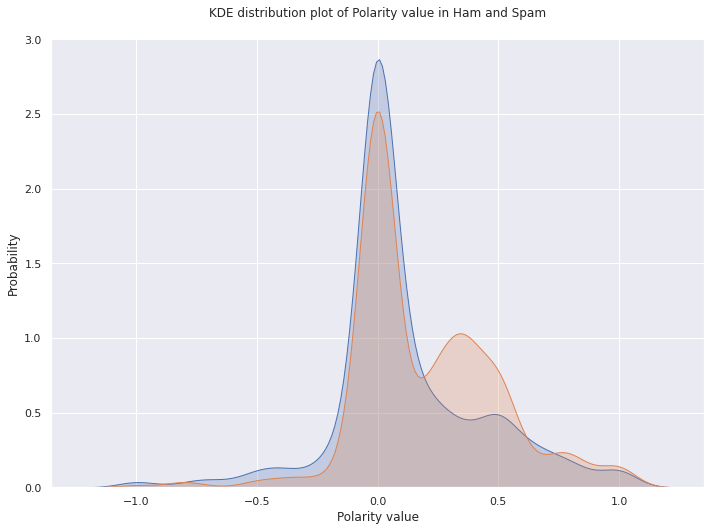

In [41]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
res=[x for x in list(df[df.label==0].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham");
res=[x for x in list(df[df.label==1].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam");
plt.title("KDE distribution plot of Polarity value in Ham and Spam\n")
plt.xlabel("Polarity value")
plt.ylabel("Probability")
plt.show()

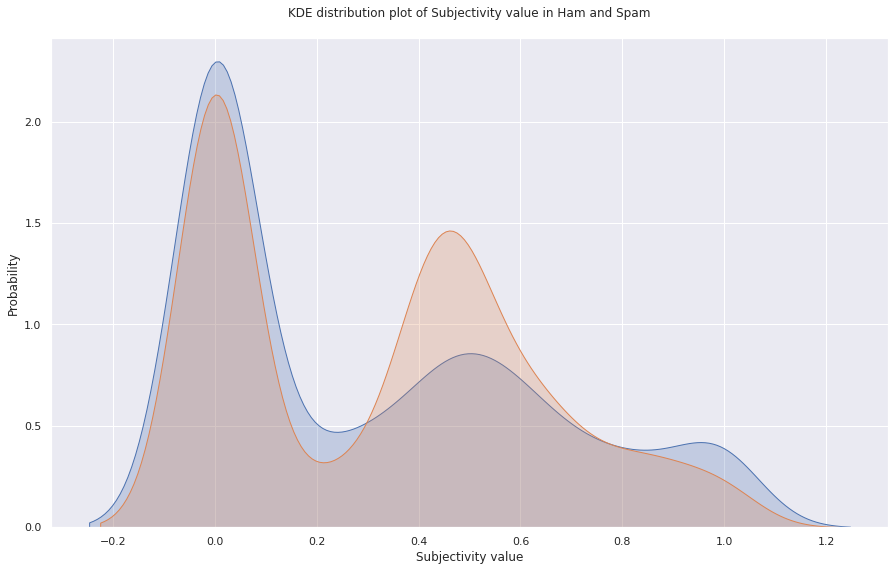

In [42]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,9)})
res=[x for x in list(df[df.label==0].subjectivity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham");
res=[x for x in list(df[df.label==1].subjectivity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam");
plt.title("KDE distribution plot of Subjectivity value in Ham and Spam\n")
plt.xlabel("Subjectivity value")
plt.ylabel("Probability")
plt.show()

In [44]:
import nltk
nltk.download('punkt')
text_corpus= ''
import string 

for i in df[df.label==1][df.sentiment_flag=='positive']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in positive sentiment spam tweets")
allWordDist.most_common(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Top words in positive sentiment spam tweets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[('https', 390),
 ('...', 147),
 ('more', 141),
 ('win', 53),
 ('amp', 42),
 ('today', 36),
 ('a', 29),
 ('free', 28),
 ('like', 28),
 ('follow', 26)]

In [45]:
import nltk
nltk.download('punkt')
text_corpus= ''
for i in df[df.label==1][df.sentiment_flag=='negative']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in negative sentiment spam tweets")
allWordDist.most_common(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Top words in negative sentiment spam tweets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[('https', 34),
 ("'s", 17),
 ('secret', 9),
 ('transponder', 8),
 ('snail', 8),
 ('inside', 8),
 ('trecru', 8),
 ('what', 6),
 ('mystery', 6),
 ('barrel', 6)]

In [46]:
text_corpus= ''
for i in df[df.label==1][df.sentiment_flag=='neutral']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in neutral sentiment spam tweets")
allWordDist.most_common(10)

Top words in neutral sentiment spam tweets


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[('https', 737),
 ('...', 160),
 ('more', 102),
 ('i', 59),
 ('weather', 42),
 ('today', 40),
 ('checked', 39),
 ('people', 37),
 ('//', 36),
 ('updates', 36)]

In [47]:
df.columns

Index(['created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'place', 'possibly_sensitive', 'quote_id',
       'retweet_count', 'retweet_id', 'retweet_screen_name', 'source', 'text',
       'tweet_url', 'user_created_at', 'user_id', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'label', 'tweet_day', 'tweet_month',
       'tweet_date', 'tweet_time', 'tweet_year', 'acc_created_day',
       'acc_created_month', 'acc_created_date', 'acc_created_time',
       'acc_created_year', 'has_hashtags', 'num_hashtags', 'has_media',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_foll

In [48]:
df[['f_ratio','length', 'DIGITS', 'CAP','num_hashtags','user_favourites_count','user_listed_count']].describe()

,f_ratio,length,DIGITS,CAP,num_hashtags,user_favourites_count,user_listed_count
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2.266000e+03,2266.000000
mean,0.546547,93.051633,2.753310,0.697705,0.545455,1.684337e+04,83.841130
std,0.266008,36.701222,3.667716,1.780930,1.115379,5.514245e+04,368.073631
min,0.005714,4.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.348156,62.000000,0.000000,0.000000,0.000000,2.400000e+01,0.000000
50%,0.525794,103.000000,2.000000,0.000000,0.000000,1.361000e+03,5.000000
75%,0.734838,126.000000,4.000000,1.000000,1.000000,1.230225e+04,33.750000
max,0.999993,150.000000,34.000000,27.000000,10.000000,1.041852e+06,7117.000000


In [49]:
from scipy import stats
np.set_printoptions(suppress=True)

print("t tests for continuous variables")

list_continous_variables=['f_ratio','length', 'DIGITS', 'CAP','num_hashtags','user_favourites_count']

for i in list_continous_variables:
    print("\nVariable name:",i)
    test = stats.ttest_ind(df[i],df['label'], equal_var = False)
    #print(test)
    if test.pvalue<0.05:
        print("The variable",i,"is significant, with a t-stat of",test.statistic)
    else:
        print("The variable",i,"is not significant")

t tests for continuous variables

Variable name: f_ratio
The variable f_ratio is significant, with a t-stat of 3.91162892220881

Variable name: length
The variable length is significant, with a t-stat of 120.03093809452922

Variable name: DIGITS
The variable DIGITS is significant, with a t-stat of 28.977097809736087

Variable name: CAP
The variable CAP is significant, with a t-stat of 5.087674515277773

Variable name: num_hashtags
The variable num_hashtags is not significant

Variable name: user_favourites_count
The variable user_favourites_count is significant, with a t-stat of 14.539854499571245


In [50]:
df = df[['label','has_hashtags', 'num_hashtags', 'has_media','user_favourites_count',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_followers_count',
       'has_user_listed_count', 'has_user_name', 'is_user_verfied', 'f_ratio',
       'length', 'DIGITS', 'CAP', 'filtered_text', 'filtered_text_lower','user_listed_count']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


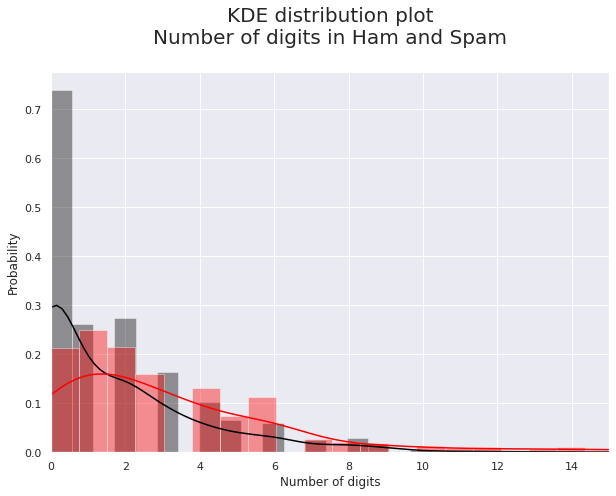

In [51]:
plt.figure(figsize=(10,7))
sns.distplot(df[df.label==0].DIGITS,color="black",kde=True,label="Ham");
sns.distplot(df[df.label==1].DIGITS,color="red",kde=True,label="Spam");
plt.xlim(0,15)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nNumber of digits in Ham and Spam\n")
plt.xlabel("Number of digits")
plt.ylabel("Probability")
plt.show()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


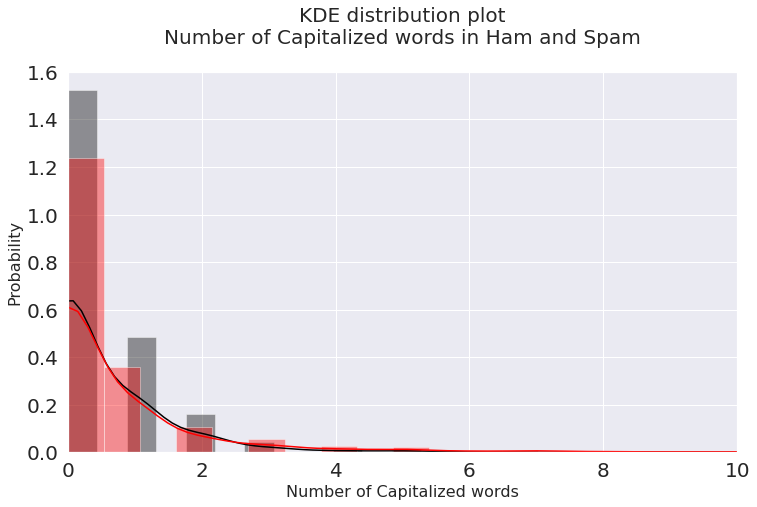

In [52]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].CAP,color="black",kde=True)
sns.distplot(df[df.label==1].CAP,color="red",kde=True)
plt.xlim(0,10)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nNumber of Capitalized words in Ham and Spam\n")
plt.xlabel("Number of Capitalized words")
plt.ylabel("Probability")
plt.show()

plt.show()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


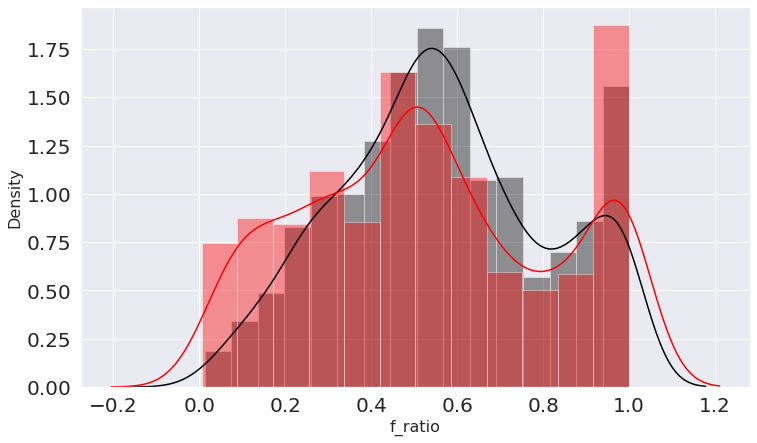

In [53]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].f_ratio,color="black",kde=True)
sns.distplot(df[df.label==1].f_ratio,color="red",kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


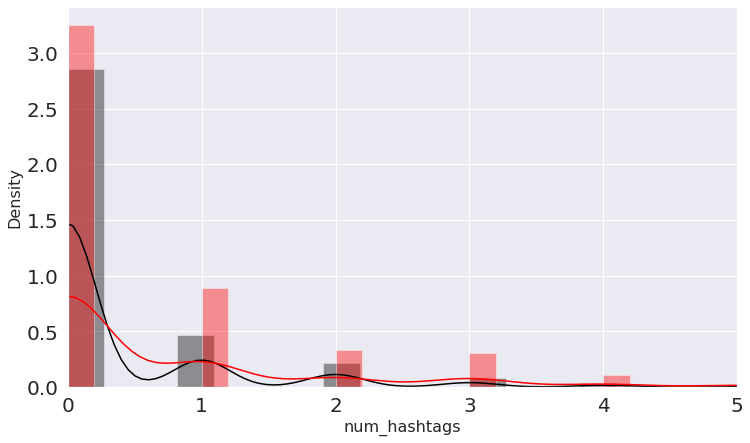

In [54]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].num_hashtags,color="black",kde=True)
sns.distplot(df[df.label==1].num_hashtags,color="red",kde=True)
plt.xlim(0,5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


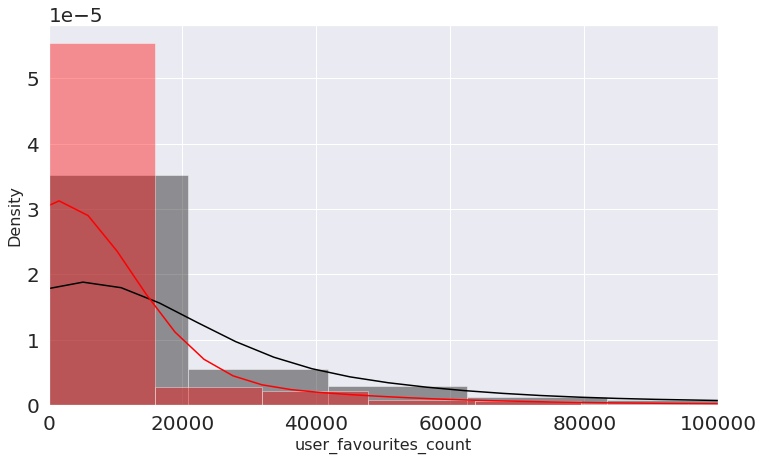

In [55]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].user_favourites_count,color="black",kde=True)
sns.distplot(df[df.label==1].user_favourites_count,color="red",kde=True)
plt.xlim(0,100000)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


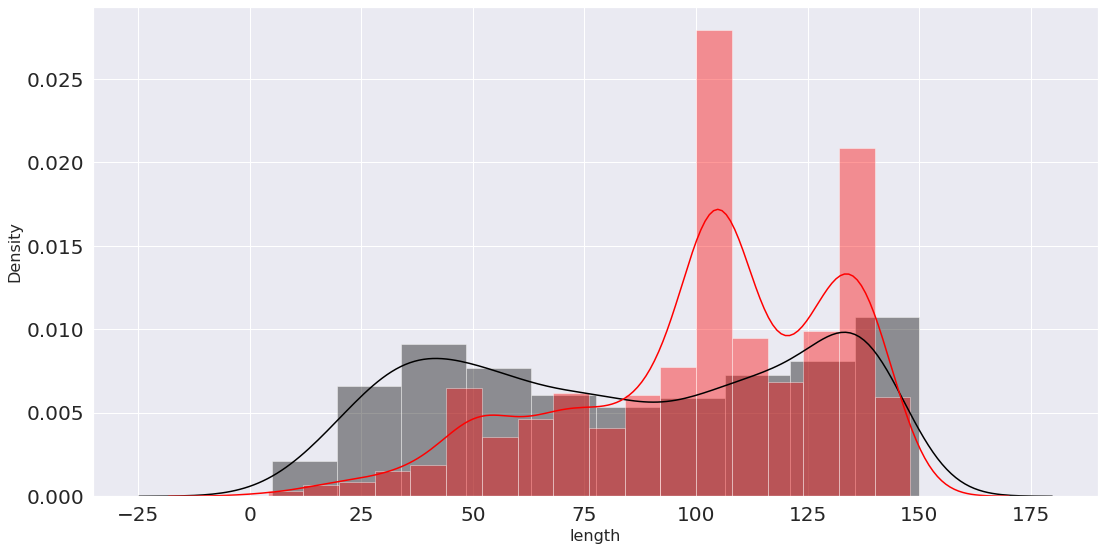

In [56]:
plt.figure(figsize=(18,9))
sns.distplot(df[df.label==0].length,color="black",kde=True)
sns.distplot(df[df.label==1].length,color="red",kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


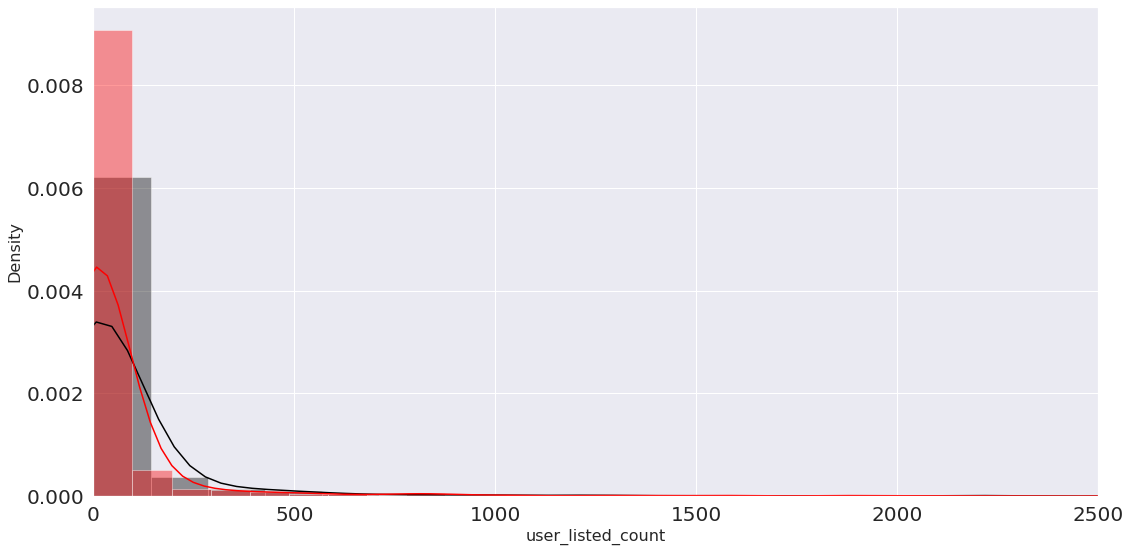

In [57]:
plt.figure(figsize=(18,9))
sns.distplot(df[df.label==0].user_listed_count,color="black",kde=True)
sns.distplot(df[df.label==1].user_listed_count,color="red",kde=True)
plt.xlim(0,2500)
plt.show()

Count plot for ' has_hashtags ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


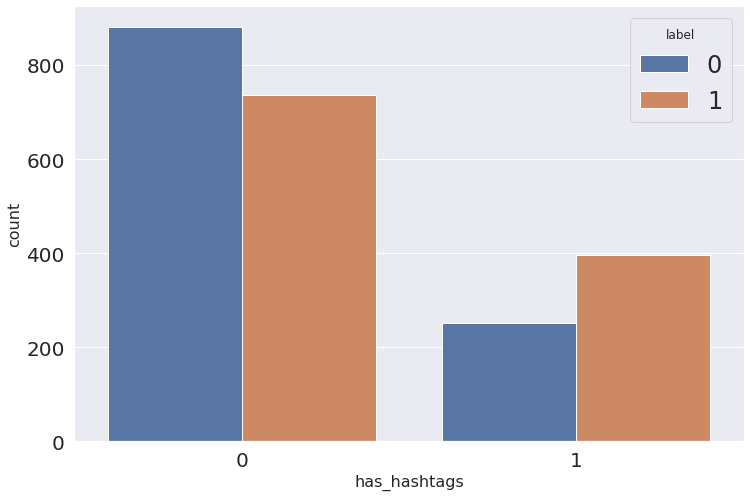



Count plot for ' num_hashtags ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


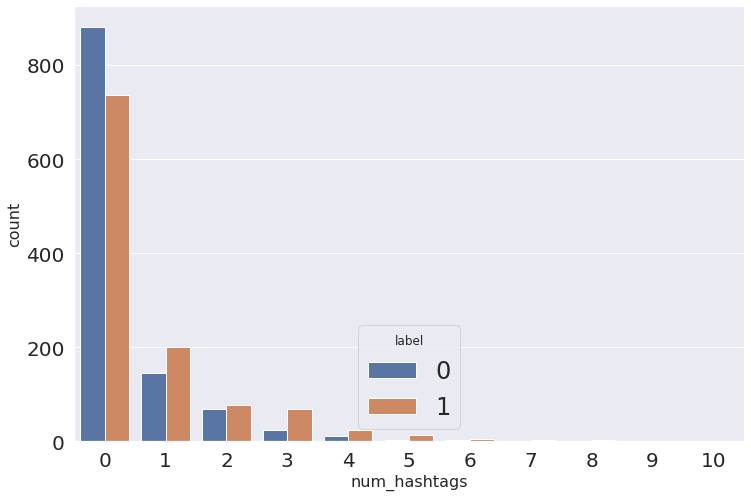



Count plot for ' has_media ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


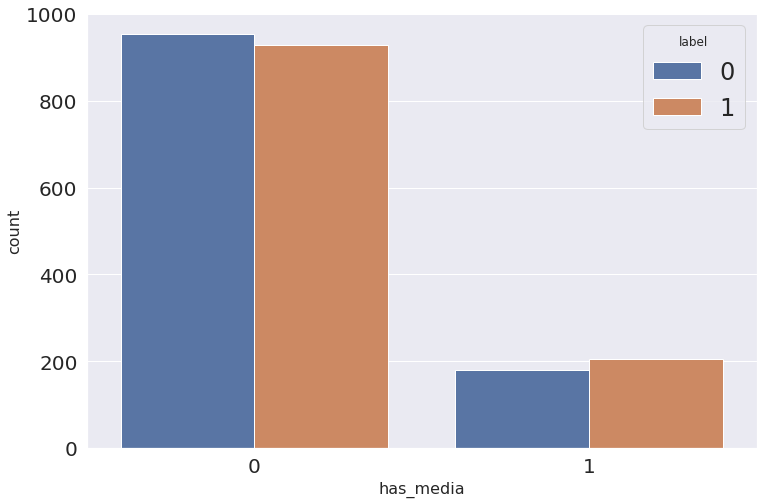



Count plot for ' has_urls ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


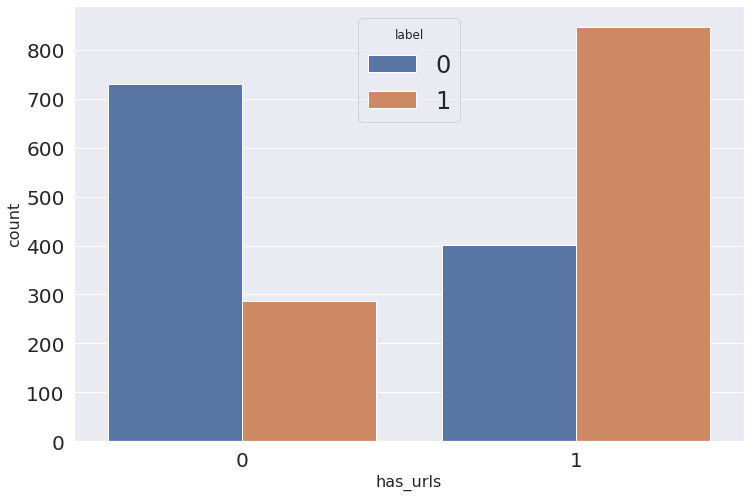



Count plot for ' has_favorite_count ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


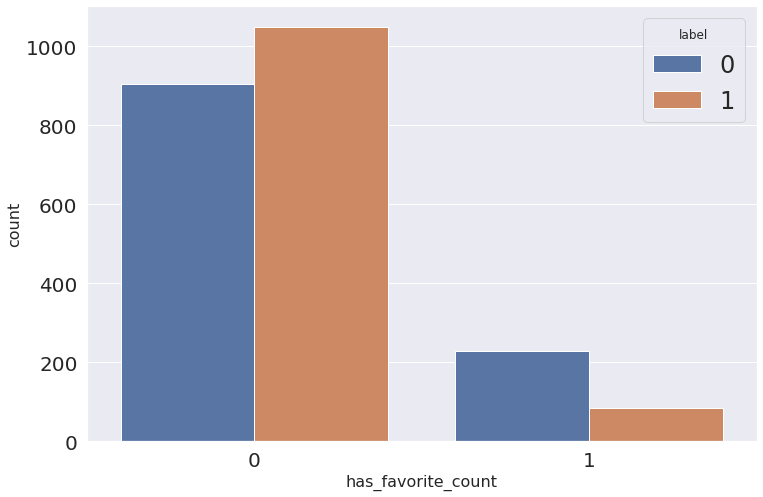



Count plot for ' has_place ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


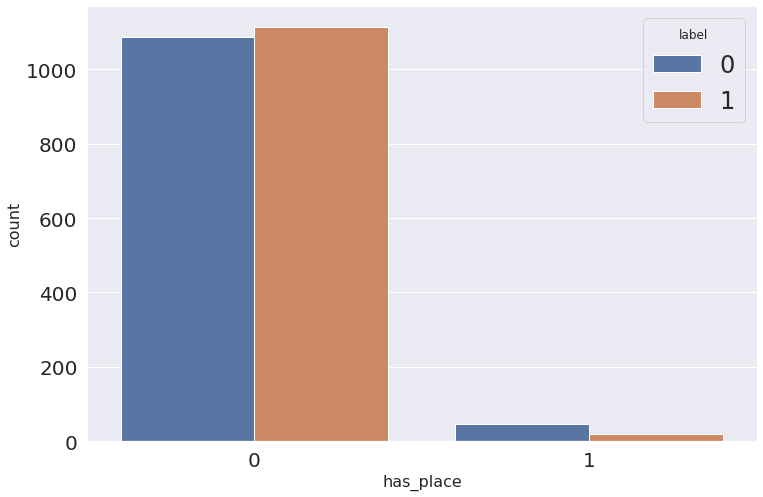



Count plot for ' has_retweet_count ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


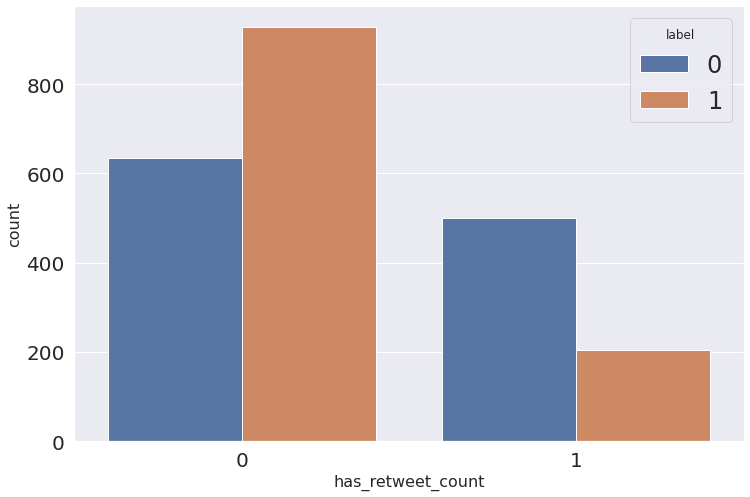



Count plot for ' is_RT ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


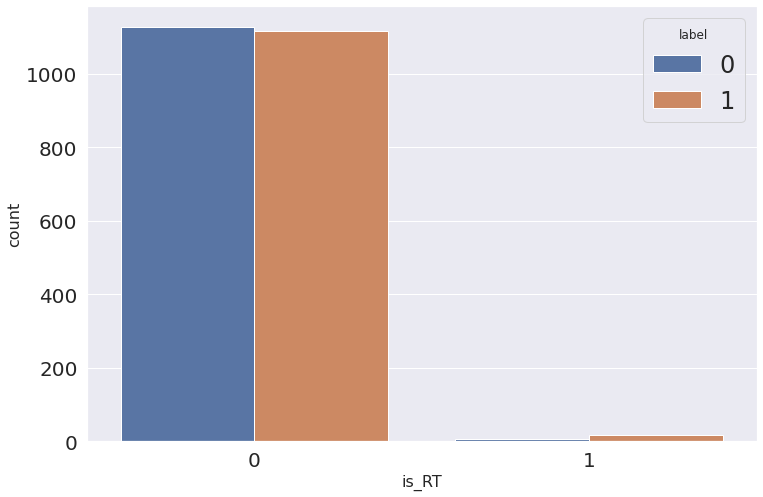



Count plot for ' has_user_description ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


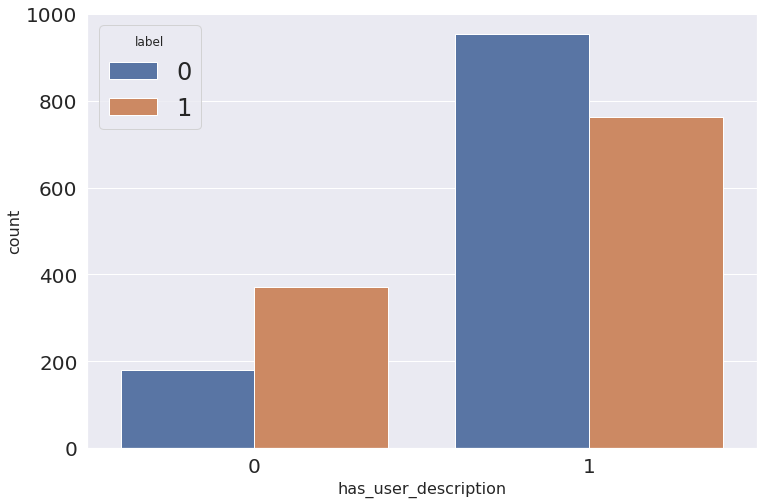



Count plot for ' has_user_name ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


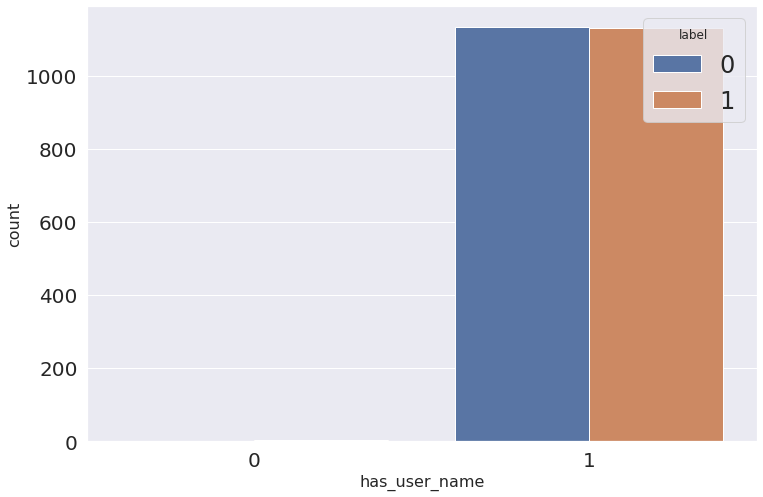



Count plot for ' is_user_verfied ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


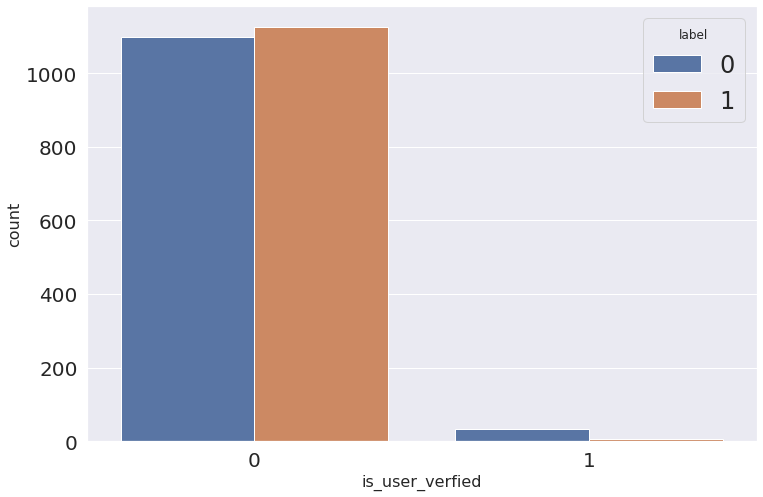



Count plot for ' DIGITS ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


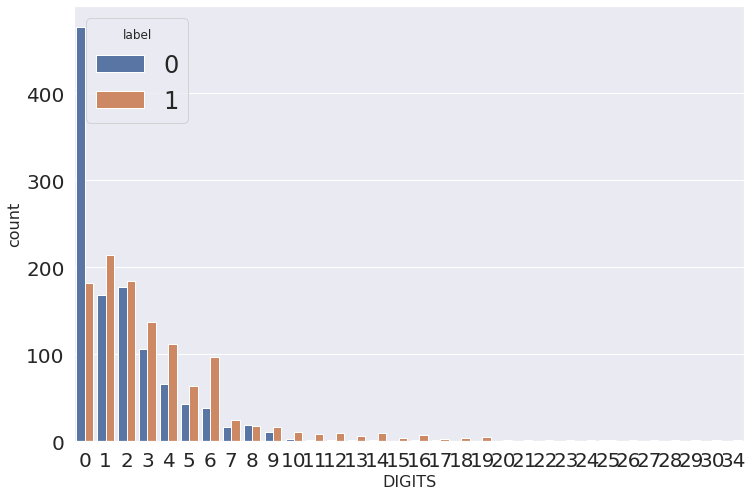



Count plot for ' CAP ' feature, based on Spam/ Ham tweet label


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


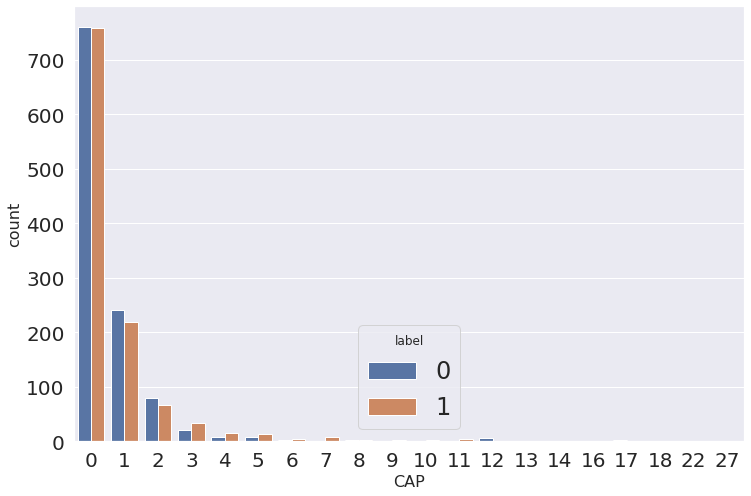

In [58]:
cols = ['label', 'has_hashtags', 'num_hashtags', 'has_media', 'has_urls',
       'has_favorite_count', 'has_place', 'has_retweet_count', 'is_RT',
       'has_user_description',  'has_user_name',
        'is_user_verfied',
        'DIGITS', 'CAP']

for i in range(1,len(cols)):
    plt.figure(figsize=(12,8))
    c = cols[i]
    print("Count plot for","'",cols[i],"' feature, based on Spam/ Ham tweet label")
    sns.countplot(c,hue=df.label,data=df)
    plt.show()
    print("\n")

In [59]:
def comfusion_matrix_properties(mat):


    from sklearn.metrics import confusion_matrix

    mat = confusion_matrix(y_test,ypred)
    print("Confusion Matrix:\n\n",mat,"\n")

    TP = mat[0][0]
    FP = mat[0][1]
    FN = mat[1][0]
    TN = mat[1][1]


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("True Positive Rate",round(TPR*100,2),"%")

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print("True Negative Rate",round(TNR*100,2),"%")

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Positive Predictive Value",round(PPV*100,2),"%")

    # Negative predictive value
    NPV = TN/(TN+FN)
    print("Negative Predictive Value",round(NPV*100,2),"%")

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("False Positive Rate",round(FPR*100,2),"%")

    # False negative rate
    FNR = FN/(TP+FN)
    print("False Negative Rate",round(FNR*100,2),"%")

    # False discovery rate
    FDR = FP/(TP+FP)
    print("False Discovery Rate",round(FDR*100,2),"%")


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Overall Accuracy",round(ACC*100,2),"%")

In [60]:
def roc_curve_plot(input_probabilities,title):
    large = 24

    plt.rc('legend',fontsize=large)
    plt.rc('axes',titlesize = 20)
    plt.rc('axes',labelsize = 16)
    plt.rc('xtick',labelsize = 14)
    plt.rc('ytick',labelsize = 14)
    #plt.set_facecolor('xkcd:white')
    plt.figure(figsize=(12,9))
    y_pred_proba_dt = input_probabilities


    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
    auc = metrics.roc_auc_score(y_test, y_pred_proba_dt)

    dt_model_object={}
    dt_model_object['fpr']=fpr
    dt_model_object['tpr']=tpr
    dt_model_object['auc']=auc

    plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve: \n'+title)
    plt.legend(loc="lower right")
    plt.grid("off")
    plt.show()

In [61]:
NB_df = df[['filtered_text_lower','label']]
NB_df = NB_df.sample(frac=1)

from sklearn.feature_extraction.text import CountVectorizer

vecfinal = CountVectorizer(min_df=50,max_df=0.8,stop_words="english")
finalX = vecfinal.fit_transform(NB_df['filtered_text_lower'])

In [62]:
split_limit = round(len(NB_df)/2)
X_train = finalX.toarray()[:split_limit]
X_test = finalX.toarray()[split_limit:]
y_train = NB_df.label[:split_limit]
y_test = NB_df.label[split_limit:]

In [63]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

clf_nb = BernoulliNB()
clf_nb.fit(X_train, y_train)
ypred = clf_nb.predict(X_test)
ypred_NB_model=clf_nb.predict(X_test)
accuracy = f1_score(y_test, ypred, average='weighted')
print("Accuracy for this model: ", accuracy*100,"%")

Accuracy for this model:  66.23146208846197 %


In [65]:
print("Naive Bayes Model ")
mat = confusion_matrix(y_test,ypred)
comfusion_matrix_properties(mat)

Naive Bayes Model 
Confusion Matrix:

 [[285 287]
 [ 84 477]] 

True Positive Rate 77.24 %
True Negative Rate 62.43 %
Positive Predictive Value 49.83 %
Negative Predictive Value 85.03 %
False Positive Rate 37.57 %
False Negative Rate 22.76 %
False Discovery Rate 50.17 %
Overall Accuracy 67.26 %


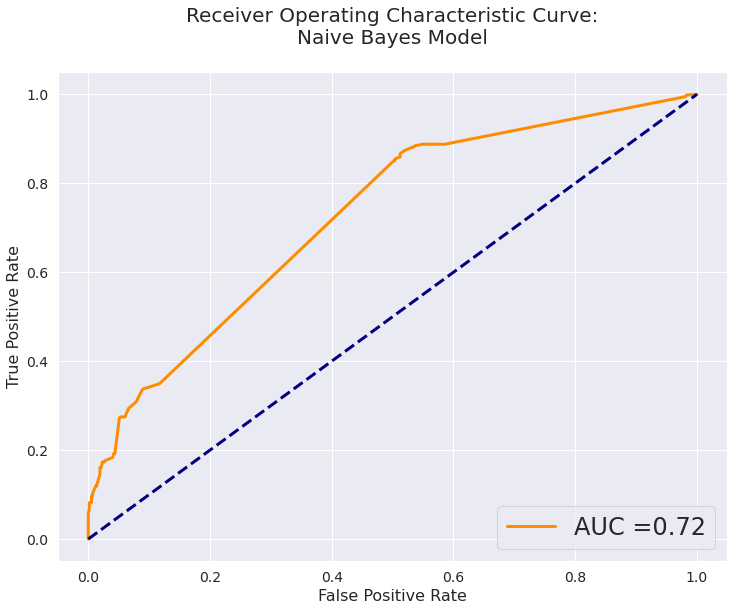

In [66]:
large = 24

from sklearn import metrics
plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn = clf_nb.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

naive_bayes_model_object={}
naive_bayes_model_object['fpr']=fpr
naive_bayes_model_object['tpr']=tpr
naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nNaive Bayes Model\n')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

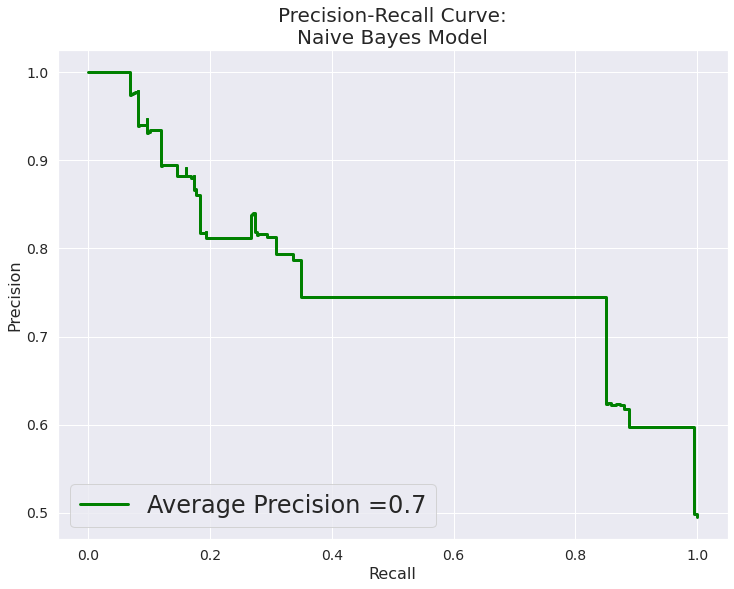

In [67]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


y_pred_proba_nb=clf_nb.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_nb)
average_precision = average_precision_score(y_test, y_pred_proba_nb)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

naive_bayes_model_object['recall']=recall
naive_bayes_model_object['precision']=precision
naive_bayes_model_object['average_precision']=average_precision

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nNaive Bayes Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

In [68]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
ypred = clf_mnb.predict(X_test)
ypred_MultinomialNB_model=clf_mnb.predict(X_test)
accuracy = f1_score(y_test, ypred, average='weighted')
print("Accuracy for this model: ", accuracy*100,"%")

Accuracy for this model:  42.99911127292277 %


In [69]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,ypred)
print("Confusion Matrix:\n\n",mat,"\n")

Confusion Matrix:

 [[308 264]
 [375 186]] 



In [70]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[308 264]
 [375 186]] 

True Positive Rate 45.1 %
True Negative Rate 41.33 %
Positive Predictive Value 53.85 %
Negative Predictive Value 33.16 %
False Positive Rate 58.67 %
False Negative Rate 54.9 %
False Discovery Rate 46.15 %
Overall Accuracy 43.6 %


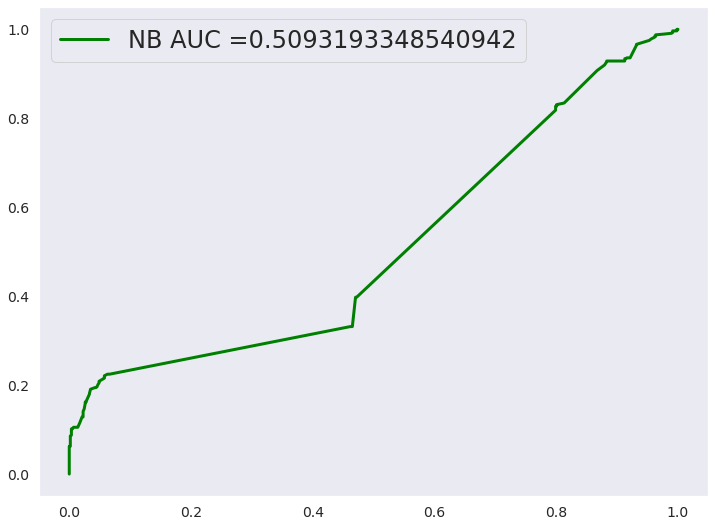

In [71]:

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12,9))
y_pred_proba_mnb = clf_mnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_mnb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_mnb)
multinomial_naive_bayes_model_object={}
multinomial_naive_bayes_model_object['fpr']=fpr
multinomial_naive_bayes_model_object['tpr']=tpr
multinomial_naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="NB AUC ="+str(auc), lw=3,color='green')

plt.legend()
plt.grid()
plt.show()

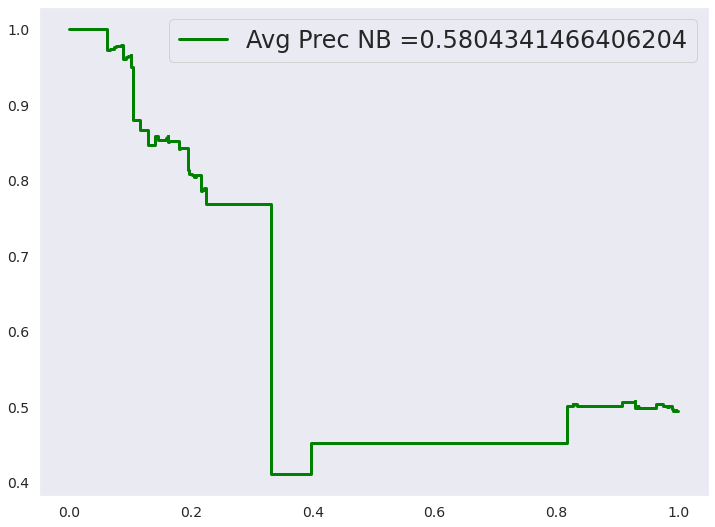

In [72]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_mnb)
average_precisionn = average_precision_score(y_test, y_pred_proba_mnb)
plt.figure(figsize=(12,9))
plt.step(recall, precision, color='green',label="Avg Prec NB ="+str(average_precisionn),lw=3)


plt.legend()
plt.grid()
plt.show()

In [73]:
y = df.label
X = df[['has_hashtags', 'num_hashtags', 'has_media','user_favourites_count',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_followers_count',
       'has_user_listed_count', 'has_user_name', 'is_user_verfied', 'f_ratio',
       'length', 'DIGITS', 'CAP','user_listed_count']]
model = X

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(model, y, test_size = 0.5,random_state=0)

depth = []
training_score = []
testing_score = []

for i in range(1,25):
    clf_dt = DecisionTreeClassifier(criterion = "gini",random_state=0)
    clf_dt.max_depth = i
    clf_dt.fit(X_train, y_train)
    pred_train = clf_dt.predict(X_train)
    #print("Training accuracy, with",i,"depth :",accuracy_score(pred_train,y_train)*100)
    
    pred_test = clf_dt.predict(X_test)
    #print("Testing accuracy, with",i,"depth :",accuracy_score(pred_test,y_test)*100,"\n")
    
    depth.append(i)
    training_score.append(accuracy_score(pred_train,y_train))
    testing_score.append(accuracy_score(pred_test,y_test))

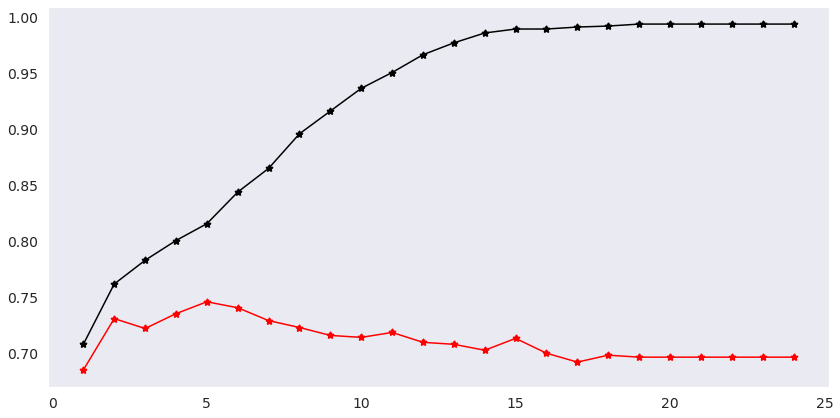

In [76]:
plt.figure(figsize=(14,7))
plt.grid()

plt.plot(depth, training_score,c='black')
plt.plot(depth, testing_score,c='red')
plt.scatter(depth, training_score,c='black',marker='*',linewidth=2)
plt.scatter(depth, testing_score,c='red',marker='*',linewidth=2)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)
    
clf = DecisionTreeClassifier(random_state=0)
 
param_grid = {
              "criterion": ["gini", "entropy"],
              "max_depth": list(np.arange(1,50,1)),
              }
 
CLF = GridSearchCV(estimator = clf, param_grid=param_grid, cv = 5)
CLF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10

In [79]:
CLF.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [80]:
clf_dt = DecisionTreeClassifier(criterion=CLF.best_params_['criterion'],max_depth=CLF.best_params_['max_depth'],random_state=0)
clf_dt.fit(X_train,y_train)
ypred = clf_dt.predict(X_test)
ypred_DT_model=clf_dt.predict(X_test)
print("Prediction Accuracy:",accuracy_score(ypred,y_test)*100,"%")

Prediction Accuracy: 74.05119152691968 %


In [81]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[439 147]
 [147 400]] 

True Positive Rate 74.91 %
True Negative Rate 73.13 %
Positive Predictive Value 74.91 %
Negative Predictive Value 73.13 %
False Positive Rate 26.87 %
False Negative Rate 25.09 %
False Discovery Rate 25.09 %
Overall Accuracy 74.05 %


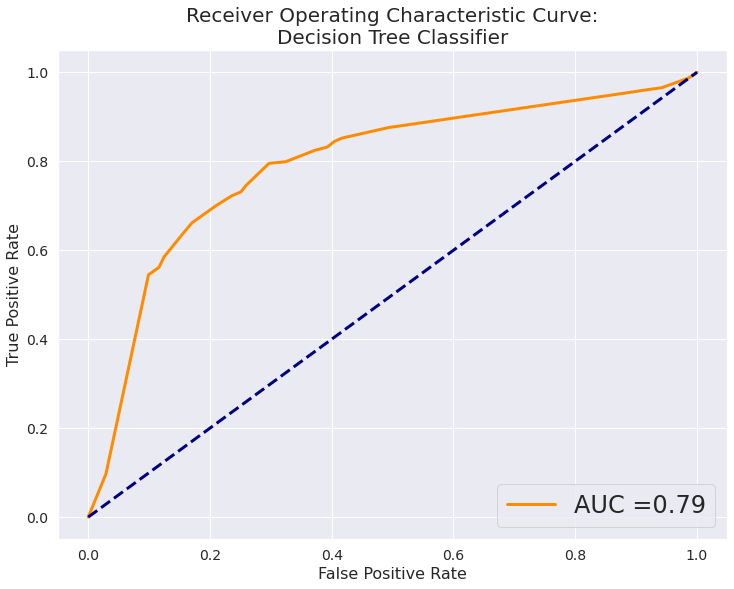

In [82]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn =clf_dt.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

dt_model_object={}
dt_model_object['fpr']=fpr
dt_model_object['tpr']=tpr
dt_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nDecision Tree Classifier')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

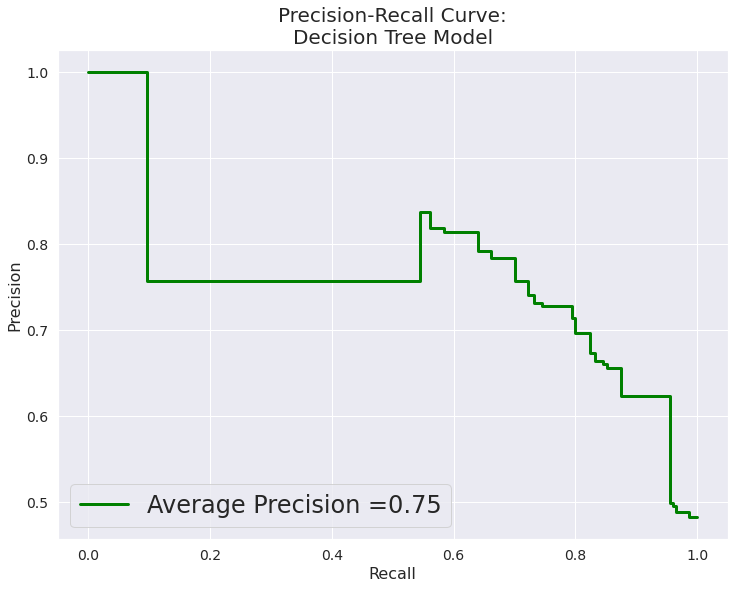

In [83]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_dt =clf_dt.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dt)
average_precision = average_precision_score(y_test, y_pred_proba_dt)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
dt_model_object['recall']=recall
dt_model_object['precision']=precision
dt_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nDecision Tree Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)
    
neigh = KNeighborsClassifier()

k = np.arange(20)+1
param_grid = {'n_neighbors': k}
                                  
CLF = GridSearchCV(estimator = neigh, param_grid = param_grid, cv = 5)
CLF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
CLF.best_params_

{'n_neighbors': 17}

In [87]:
neigh = KNeighborsClassifier(n_neighbors = CLF.best_params_['n_neighbors'])
neigh.fit(X_train,y_train)
ypred = neigh.predict(X_test)
ypred_knn_model=neigh.predict(X_test)
accuracy_score(ypred,y_test)*100

66.10767872903796

In [88]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[363 223]
 [161 386]] 

True Positive Rate 69.27 %
True Negative Rate 63.38 %
Positive Predictive Value 61.95 %
Negative Predictive Value 70.57 %
False Positive Rate 36.62 %
False Negative Rate 30.73 %
False Discovery Rate 38.05 %
Overall Accuracy 66.11 %


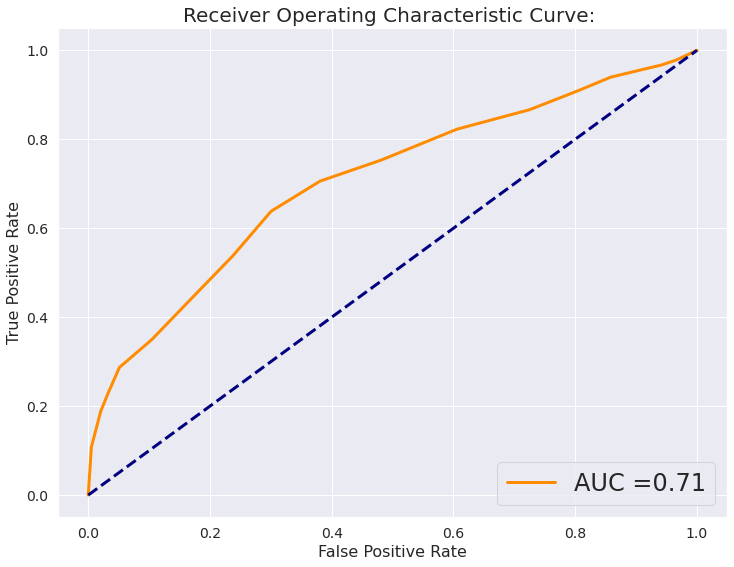

In [89]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn = neigh.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

knn_model_object={}
knn_model_object['fpr']=fpr
knn_model_object['tpr']=tpr
knn_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve: ')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

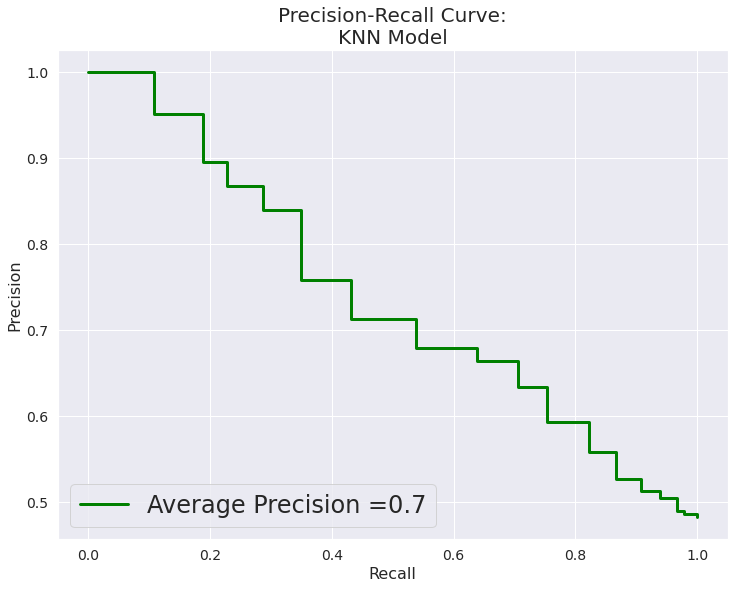

In [90]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_knn = neigh.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_knn)
average_precision = average_precision_score(y_test, y_pred_proba_knn)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
knn_model_object['recall']=recall
knn_model_object['precision']=precision
knn_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nKNN Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier
print("RANDOM FOREST CLASSIFIER")

rfc = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)

rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
ypred_rfc_model=rfc.predict(X_test)
print("Prediction Accuracy:",round(accuracy_score(ypred,y_test)*100,2),"%")


mat = confusion_matrix(y_test,ypred)

print(comfusion_matrix_properties(mat))
print()

print("Feature importances:")
print(rfc.feature_importances_)

RANDOM FOREST CLASSIFIER
Prediction Accuracy: 75.9 %
Confusion Matrix:

 [[445 141]
 [132 415]] 

True Positive Rate 77.12 %
True Negative Rate 74.64 %
Positive Predictive Value 75.94 %
Negative Predictive Value 75.87 %
False Positive Rate 25.36 %
False Negative Rate 22.88 %
False Discovery Rate 24.06 %
Overall Accuracy 75.9 %
None

Feature importances:
[0.01687675 0.03492767 0.01212887 0.16783393 0.10265016 0.01560771
 0.00698343 0.05371823 0.00425178 0.02000033 0.         0.
 0.00026929 0.00449282 0.12961495 0.18464162 0.09691682 0.0406648
 0.10842084]


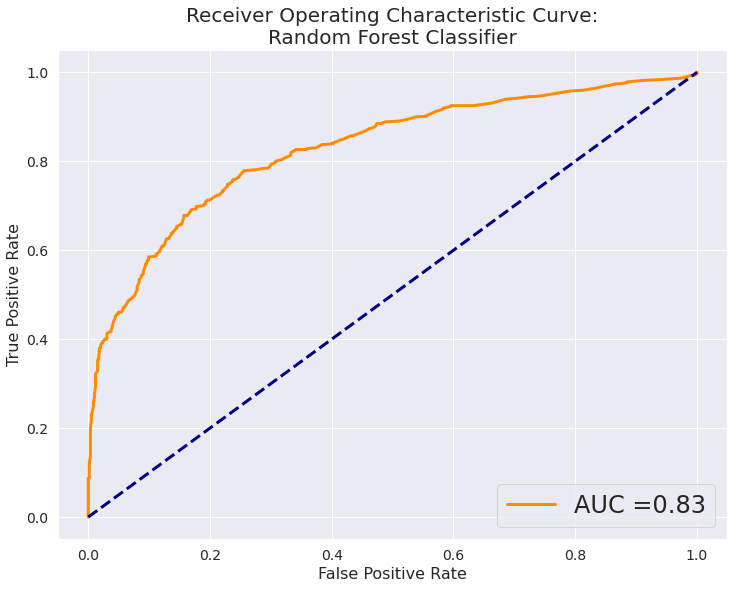

In [92]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)

rfc_model_object={}
rfc_model_object['fpr']=fpr
rfc_model_object['tpr']=tpr
rfc_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nRandom Forest Classifier')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

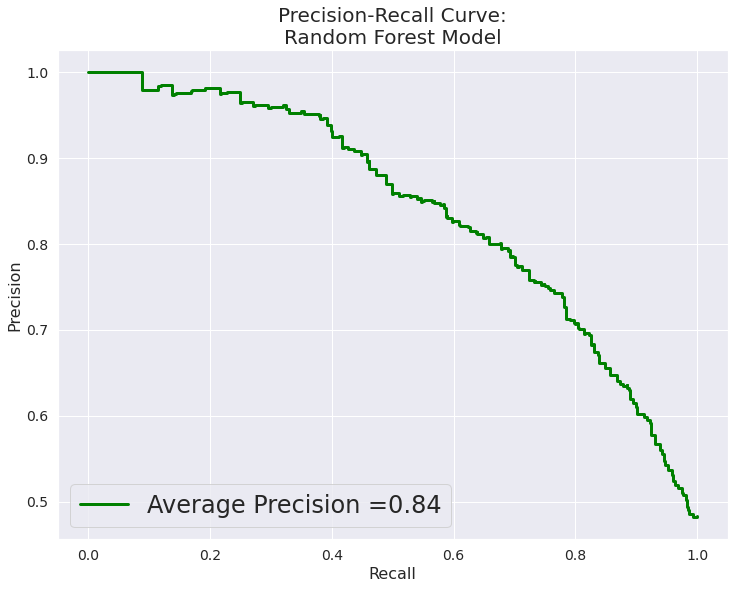

In [93]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rfc)
average_precision = average_precision_score(y_test, y_pred_proba_rfc)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
rfc_model_object['recall']=recall
rfc_model_object['precision']=precision
rfc_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nRandom Forest Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

In [94]:
for i in range(len(rfc.feature_importances_)):
    print(X_train.columns[i],rfc.feature_importances_[i])

has_hashtags 0.01687675137559896
num_hashtags 0.034927671155655766
has_media 0.012128870180250816
user_favourites_count 0.16783393313694372
has_urls 0.10265016396884032
has_favorite_count 0.015607706807479298
has_place 0.006983427593504229
has_retweet_count 0.053718229276563195
is_RT 0.004251778644509621
has_user_description 0.020000329611906235
has_user_followers_count 0.0
has_user_listed_count 0.0
has_user_name 0.0002692927296182256
is_user_verfied 0.004492821483362715
f_ratio 0.12961495152147764
length 0.18464161785610034
DIGITS 0.09691681902251054
CAP 0.04066479544945519
user_listed_count 0.10842084018622325


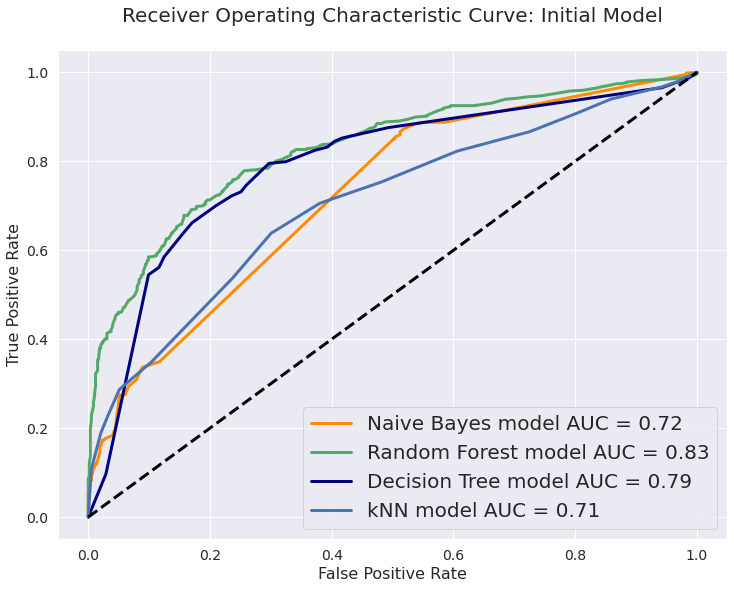

In [95]:
large = 20

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))


plt.plot(naive_bayes_model_object['fpr'],naive_bayes_model_object['tpr'],label="Naive Bayes model AUC = "+str(round(naive_bayes_model_object['auc'],2)), lw=3,color='darkorange')

plt.plot(rfc_model_object['fpr'],rfc_model_object['tpr'],label="Random Forest model AUC = "+str(round(rfc_model_object['auc'],2)), lw=3,color='g')



plt.plot(dt_model_object['fpr'],dt_model_object['tpr'],label="Decision Tree model AUC = "+str(round(dt_model_object['auc'],2)), lw=3,color='navy')
plt.plot(knn_model_object['fpr'],knn_model_object['tpr'],label="kNN model AUC = "+str(round(knn_model_object['auc'],2)), lw=3,color='b')


plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve: Initial Model\n')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

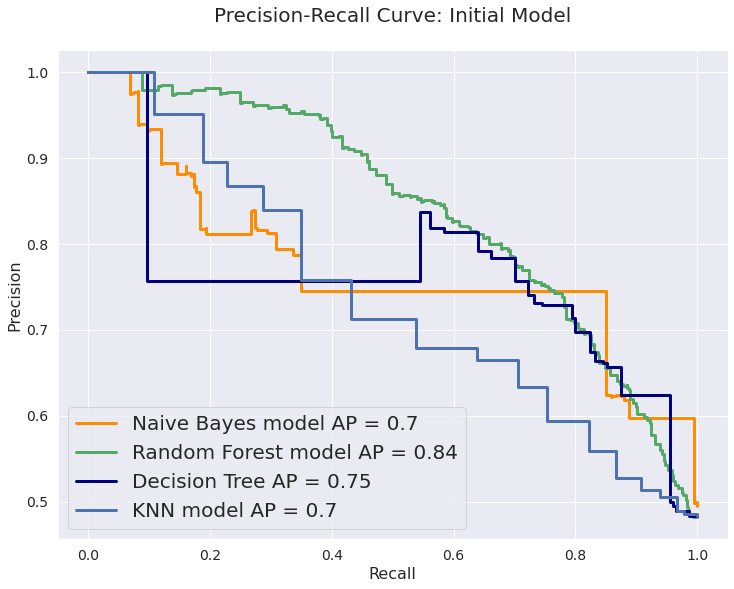

In [96]:
large = 20

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))



plt.step(naive_bayes_model_object['recall'], naive_bayes_model_object['precision'], color='darkorange',label="Naive Bayes model AP = "+str(round(naive_bayes_model_object['average_precision'],2)),lw=3)
plt.step(rfc_model_object['recall'], rfc_model_object['precision'], color='g',label="Random Forest model AP = "+str(round(rfc_model_object['average_precision'],2)),lw=3)
plt.step(dt_model_object['recall'], dt_model_object['precision'], color='navy',label="Decision Tree AP = "+str(round(dt_model_object['average_precision'],2)),lw=3)
plt.step(knn_model_object['recall'], knn_model_object['precision'], color='b',label="KNN model AP = "+str(round(knn_model_object['average_precision'],2)),lw=3)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Initial Model\n')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()